In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from bokeh.io import show, output_notebook
output_notebook()

Loading BokehJS ...

In [3]:
data = pd.read_csv('data/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [5]:
categorical_columns = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 
                       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
                       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 
                       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
                       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 
                       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'YrSold']

In [6]:
numerical_columns = ['LotFrontage', 'LotArea', 
                        'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
                        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                        'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 
                        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                        'PoolArea', 'MiscVal', 'MoSold']

In [7]:
from bokeh.charts import Bar
from bokeh.charts import defaults
from bokeh.io import gridplot
from bokeh.plotting import figure
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource

In [8]:
def categoriy_df(df, col):
    vc = df[col].value_counts().to_frame()
    total_sum = vc[col].sum()
    vc['percent'] = vc[col] * 100 / total_sum
    return vc.reset_index()


def bar(df, col, title=None, width=280, height=280):
    vc = categoriy_df(df, col)
    vc['percent'] = vc['percent'].apply(lambda i: "{0:.3}%".format(i))
    vc['index'] = vc['index'].astype('str')
    
    
    source = ColumnDataSource(data=dict(x=vc['index'], y=vc[col], percent=vc['percent']))
    hover = HoverTool(
        tooltips=[
            ('category', '@x'),
            ('percent', '@percent'),
        ]
    )
    p = figure(title=title, 
               x_range=vc['index'].values.tolist(), 
               plot_width=width, plot_height=height, 
               toolbar_location=None,
               tools=[hover]
              )
    
    p.vbar(x='x', source=source, width=0.5, bottom=0, top='y')
    p.yaxis.visible = False

    p.xaxis.axis_label = col
    p.xaxis.axis_label_standoff = -1
    return p

In [9]:
# plots = [bar(data, categorical_columns[col]) for col in xrange(0, len(categorical_columns))]
# chunks = [plots[x:x+3] for x in xrange(0, len(plots), 3)]
# show(gridplot(chunks, toolbar_location=None))

In [10]:
# p = bar(data, 'MSSubClass', width=600, height=600)
# show(p)

In [11]:
def trim_categories(df, col, threshold=2.0):
    vc = categoriy_df(df, col)
    vc = vc[vc['percent'] >= threshold]
    
    df.loc[~df[col].isin(vc['index']), col] = 'None'
    return df


def side_by_side1(df, col, size=(400, 400), threshold=2.0):
    p = bar(data, col, width=size[0], height=size[1])
    df = trim_categories(df, col, threshold=threshold)

    q = bar(data, col, width=size[0], height=size[1])
    return p, q

In [12]:
rows = []
for column in categorical_columns:
    s1, s2 = side_by_side1(data, column, threshold=5.0)
    rows.append([s1, s2])
    
show(gridplot(rows))

In [13]:
from sklearn.preprocessing import Imputer

In [14]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
data[numerical_columns] = imp.fit_transform(data[numerical_columns])
data.isnull().values.any()

False

In [15]:
data[categorical_columns] = data[categorical_columns].apply(LabelEncoder().fit_transform)

In [16]:
data['Age'] = data['YrSold'] - data['YearBuilt']
data['remodAge'] = data['YrSold'] - data['YearRemodAdd']

In [17]:
print numerical_columns

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [18]:
from bokeh.charts import Histogram

In [19]:
def histogram(df, col, size=(400, 400)):
    p = figure(title=col, toolbar_location=None, plot_width=size[0], plot_height=size[1])
    measured = df[col]
    hist, edges = np.histogram(measured, density=True, bins=50)
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
            fill_color="#036564", line_color="#033649")
    return p

In [20]:
# show(histogram(data, 'LotFrontage'))

In [21]:
from scipy.stats import boxcox, skew
from sklearn.preprocessing import StandardScaler

In [22]:
rows = []
for column in numerical_columns:
    s1 = histogram(data, column)
    s2 = None
    if skew(data[column]) > 0.25:
        data[column], lam = boxcox(data[column]+1.00)
        s2 = histogram(data, column)
    rows.append([s1, s2])
show(gridplot(rows))

In [23]:
ss = StandardScaler()
data[numerical_columns] = ss.fit_transform(data[numerical_columns].values)
data[numerical_columns] = pd.DataFrame(data[numerical_columns],
                                       index=data[numerical_columns].index,
                                       columns=data[numerical_columns].columns)

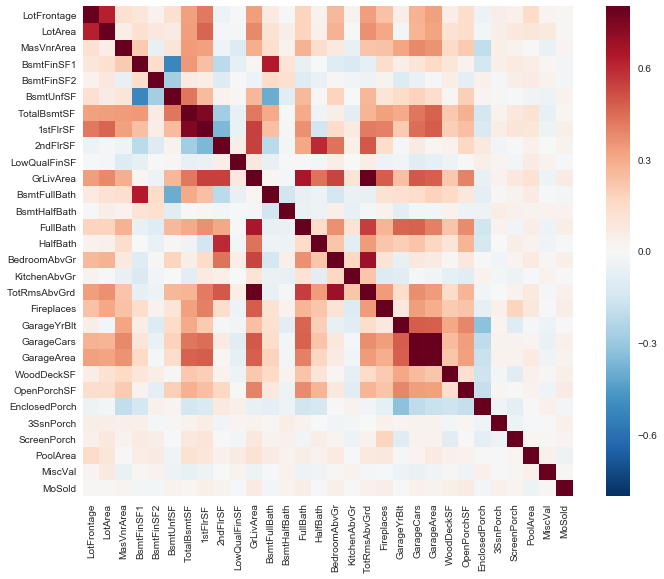

In [24]:
corr_matrix = data[numerical_columns].corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True)

In [25]:
corr_matrix.values.shape

(30, 30)

In [26]:
corr_matrix.iloc[0, 2]

0.1263807698323933

In [27]:
for i in xrange(0, corr_matrix.values.shape[0]):
    for j in xrange(0, corr_matrix.values.shape[1]):
        if i < j:
            if corr_matrix.iloc[i, j] > 0.8:
                print i, j, corr_matrix.iloc[i, j]

10 17 0.829970737975
20 21 0.882475414281


### What to do with high correlated variables?

In [28]:
from sklearn.cross_validation import _BaseKFold
from sklearn.utils.validation import check_random_state
import numpy as np

class RegStratifiedKFold(_BaseKFold):
    def __init__(self, y, n_folds=5, shuffle=False, random_state=None):
        super(RegStratifiedKFold, self).__init__(len(y), n_folds=n_folds, shuffle=shuffle, random_state=random_state)
        ylen = len(y)
        if ylen / n_folds <= 1:
            print "Too few elements in y. Still in ToDo list"
            exit()
        y_index = np.arange(ylen)[np.argsort(y)]
        num_classes = ylen / n_folds + int(ylen % n_folds != 0)
        
        num_head_tail_classes = n_folds * (ylen / n_folds / 2)
        head_classes = y_index[0:num_head_tail_classes].reshape(-1,n_folds)
        tail_classes = y_index[-num_head_tail_classes:].reshape(-1,n_folds)
        
        middle_class = y_index[num_head_tail_classes:-num_head_tail_classes] 
        middle_class = np.hstack([middle_class, -np.ones(n_folds - len(middle_class) % n_folds, dtype=int)])
        middle_class = middle_class.reshape(-1,n_folds)
        
        test_masks = np.vstack([head_classes, middle_class, tail_classes])
        self._test_masks = []
        
        if shuffle:
            rng = check_random_state(self.random_state)
            for cls in test_masks:
                rng.shuffle(cls)
                self._test_masks.append(cls.tolist())
        else:
            self._test_masks = test_masks
            
        self._test_masks = np.array(self._test_masks).T
        self._test_masks = [y[y!=-1] for y in self._test_masks]
        
    def _iter_test_masks(self):
        indarr = np.zeros( self.n, dtype = bool)
        for mask in self._test_masks:
            indarr[:] = False
            indarr[mask] = True 
            yield indarr

/home/ali/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
def CV(target):
#     return StratifiedKFold(target, n_folds=3,
#                            shuffle=True, random_state=41)
    return RegStratifiedKFold(target, n_folds=5, shuffle=True, random_state=41)


def grid_search(model, params, cv):
    return GridSearchCV(estimator=model,
                        param_grid=params,
                        cv=cv)


def regression_results(model, x_true, y_true, y_pred):
    ret = {}
    ret["Explained variance regression score"] = explained_variance_score(
        y_true, y_pred, multioutput='uniform_average')
    ret["Mean Absolute Error"] = mean_absolute_error(
        y_true, y_pred)
    ret["Model socre"] = model.score(
        x_true, y_true)
    return ret


def draw_feature_importance(model, data):
    importances = model.feature_importances_
    std = np.std(
        [tree.feature_importances_ for tree in model.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]
    feature_names = data.columns
    # Plot the feature importances of the model
    plt.figure(figsize=(20, 15))
    plt.title("Feature importances")
    plt.bar(range(data.shape[1]), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(data.shape[1]), feature_names[indices], rotation=90)
    plt.xlim([-1, data.shape[1]])
    return plt


def model_test_metrics(model, data, target):
    ret = {}
    ret["Test Data score"] = model.fit(data, target).score(data, target)
    return merge_dicts(ret, regression_results(target, model.predict(data)))


def evaluate_model(model, data, target,
                   params=None, draw_features=True, verbose=True):
    train_data, test_data, train_target, test_target = train_test_split(
        data, target)
    cv=CV(train_target)
#     cv = 3
    ret = {}
    if params:
        grid = grid_search(model, params, cv)

        grid.fit(train_data, train_target)
        model = grid.best_estimator_
    else:
        model.fit(train_data, train_target)

    s = cross_val_score(model, train_data, train_target, cv=cv, n_jobs=-1)
    ret["Mean cross validation score"] = s.mean()
    predictions = model.predict(test_data)
    ret = merge_dicts(ret, regression_results(
        model, test_data, test_target, predictions))

    if draw_features:
        draw_feature_importance(model, train_data)
    return model, ret

def print_model_report(report, score=None, model=None):
    if model:
        print model, "\n"
    for title, value in report.iteritems():
        print "{:<50}{}".format(title, value)
    if score:
        print "\n", "{:<50}{}".format('score for test data', score)


def plot_predicted_measured(ax, y_real, predictions, fontsize=24, title=''):
    ax.scatter(y_real, predictions)
    ax.plot([predictions.min(), predictions.max()],
            [predictions.min(), predictions.max()], 'k--', lw=2)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    ax.set_title(title, fontsize=fontsize)


def set_style():
    plt.style.use(['seaborn-white', 'seaborn-paper'])


def plot_comparisions(y_real, y_lr, y_rd, y_rf, y_et):
    set_style()
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
    fig.set_figheight(12)
    fig.set_figwidth(12)
    plot_predicted_measured(
        ax1, y_real, y_lr, fontsize=16, title='Linear Regression')
    plot_predicted_measured(
        ax2, y_real, y_rd, fontsize=16, title='RidgeCV')
    plot_predicted_measured(
        ax3, y_real, y_rf, fontsize=16, title='Random Forest')
    plot_predicted_measured(
        ax4, y_real, y_et, fontsize=16, title='Extra Trees')

    plt.show()

In [30]:
def extra_trees(data, target, draw_features=False):
    params = {
        'n_estimators': [10, 20, 50, 100, 200],
        'max_depth': [1, 2, 3, 4, 5],
        'min_samples_split': [2, 10, 25, 50, 100],
    }
    return evaluate_model(ExtraTreesRegressor(n_jobs=-1),
                          data, target,
#                           params=params, 
                          draw_features=draw_features)

In [31]:
x = transformed_data.copy()
y = data.SalePrice

NameError: name 'transformed_data' is not defined